In [33]:
#Carga del dataset usando Pandas.
#Exploración inicial: dimensiones, primeras filas, tipos de datos
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import seaborn as sns
df = pd.read_csv("pacientes_covid.csv")
print("primeras filas")
print(df.head())

print("dimensiones","\n",df.shape)

print("tipo de datos","\n",df.dtypes)


primeras filas
   ID  Edad    Sexo  Temperatura  Presion_Sistolica  Presion_Diastolica  \
0   1    52  Hombre         35.5                155                  75   
1   2    15  Hombre         38.1                142                  66   
2   3    72   Mujer         35.8                140                  76   
3   4    61  Hombre         38.6                128                  82   
4   5    21   Mujer         35.9                140                  85   

   Frecuencia_Cardiaca  Nivel_Oxigeno Enfermo_COVID Hospitalizado  
0                   89             97            No            Sí  
1                   73             93            Sí            No  
2                   66             81            No            No  
3                   76             88            Sí            No  
4                  103             84            Sí            Sí  
dimensiones 
 (300, 10)
tipo de datos 
 ID                       int64
Edad                     int64
Sexo                    

In [34]:
#Número total de pacientes.
#Promedio de edad.
#Paciente más joven y más viejo.
#Promedio de temperatura.

print("Numero total de pacientes","\n",df["ID"].count())

print("promedio edad","\n",df["Edad"].mean())

paciente_mas_viejo = df[df["Edad"] == df["Edad"].max()]
print(paciente_mas_viejo)

paciente_mas_joven = df[df["Edad"] == df["Edad"].min()]
print(paciente_mas_joven)

print("promedio temperatura","\n",df["Temperatura"].mean())

Numero total de pacientes 
 300
promedio edad 
 43.86333333333334
      ID  Edad    Sexo  Temperatura  Presion_Sistolica  Presion_Diastolica  \
26    27    89   Mujer         37.6                 94                  94   
48    49    89   Mujer         35.6                158                  72   
91    92    89   Mujer         36.3                130                  79   
98    99    89   Mujer         35.6                123                  64   
170  171    89  Hombre         34.8                126                  97   
246  247    89   Mujer         37.8                100                  76   
276  277    89  Hombre         36.5                101                  93   

     Frecuencia_Cardiaca  Nivel_Oxigeno Enfermo_COVID Hospitalizado  
26                    77             91            Sí            Sí  
48                   105             96            Sí            No  
91                   118             90            Sí            Sí  
98                    91     

In [35]:
#Promedio de saturación de oxígeno en pacientes enfermos vs sanos.
promedios = df.groupby("Enfermo_COVID")["Nivel_Oxigeno"].mean()
print(promedios)

Enfermo_COVID
No    88.836207
Sí    89.385870
Name: Nivel_Oxigeno, dtype: float64


In [36]:
#cuantas mujeres enfermas y cuantas sanas

conteoMujeres = df['Sexo'].value_counts()
print("numero de mujeres: ",conteoMujeres['Mujer'])

conteos = df[df['Sexo'] == 'Mujer']['Enfermo_COVID'].value_counts()
print(conteos)


numero de mujeres:  160
Enfermo_COVID
Sí    95
No    65
Name: count, dtype: int64


In [37]:
#cuantos hombres enfermos y cuantas sanos

conteoHombres = df['Sexo'].value_counts()
print("numero de Hombres: ",conteoHombres['Hombre'])

conteos = df[df['Sexo'] == 'Hombre']['Enfermo_COVID'].value_counts()
print(conteos)

numero de Hombres:  140
Enfermo_COVID
Sí    89
No    51
Name: count, dtype: int64


In [38]:
#Clasificar a los pacientes en niños (<12 años), jóvenes (13-30 años),
#adultos (31-59 años) y adultos mayores (60+ años). Contar enfermos y
#sanos por grupo de edad.


niños = (df['Edad'] <= 12).sum()
print("numero de niños",niños)
conteo = df[df['Edad'] <= 12]['Enfermo_COVID'].value_counts()
print(conteo)
print("\n")

contJovenes = (df['Edad'] >= 13) & (df['Edad'] <=30)
jovenes = contJovenes.sum()
print("numero de jovenes",jovenes)
conteoJ = df.loc[contJovenes,'Enfermo_COVID'].value_counts()
print(conteoJ)
print("\n")

contAdultos = (df['Edad'] >= 31) & (df['Edad'] <=59)
adultos = contAdultos.sum()
print("numero de adultos",adultos)
conteoA = df.loc[contAdultos, 'Enfermo_COVID'].value_counts()
print(conteoA)
print("\n")

adultoM = (df['Edad'] >= 60).sum()
print("numero de adultos mayores",adultoM)
conteoM = df[df['Edad']>= 60]['Enfermo_COVID'].value_counts()
print(conteoM)




numero de niños 49
Enfermo_COVID
Sí    34
No    15
Name: count, dtype: int64


numero de jovenes 54
Enfermo_COVID
Sí    27
No    27
Name: count, dtype: int64


numero de adultos 96
Enfermo_COVID
Sí    61
No    35
Name: count, dtype: int64


numero de adultos mayores 101
Enfermo_COVID
Sí    62
No    39
Name: count, dtype: int64


In [39]:
#Porcentaje de pacientes hospitalizados vs no hospitalizados.

pacienteH = df['Hospitalizado'].value_counts()
print("numero de pacientes hospitalizados: ",pacienteH['Sí'])
print("\n")
pacienteNoH = df['Hospitalizado'].value_counts()
print("numero de pacientes no hospitalizados: ",pacienteNoH['No'])
print("\n")
total = len(df)
hospitalizados = (df['Hospitalizado'] == 'Sí').sum()
porcentaje_Hosp = (hospitalizados / total) * 100
print("porcentaje hospitalizado; ", porcentaje_Hosp)
print("\n")
total = len(df)
hospitalizadosNo = (df['Hospitalizado'] == 'No').sum()
porcentaje_NoHosp = (hospitalizadosNo / total) * 100
print("porcentaje no hospitalizado; ", porcentaje_NoHosp)


numero de pacientes hospitalizados:  96


numero de pacientes no hospitalizados:  204


porcentaje hospitalizado;  32.0


porcentaje no hospitalizado;  68.0


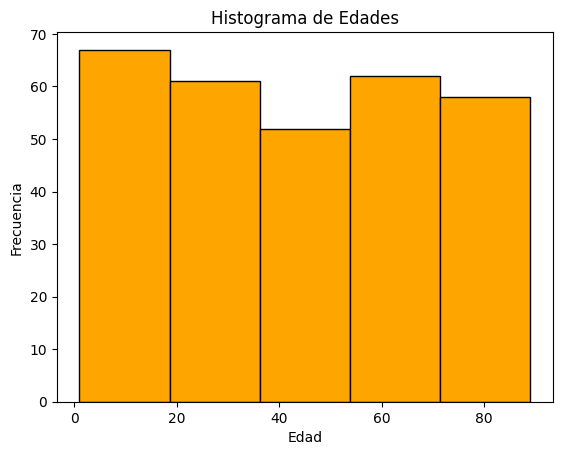

In [40]:
#Visualizaciones con Matplotlib/Seaborn:
# Histograma de edades.

plt.hist(df['Edad'], bins=5, color='orange', edgecolor='black')
plt.title('Histograma de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

mujeres enfermas 95
Hombres enfermos 89


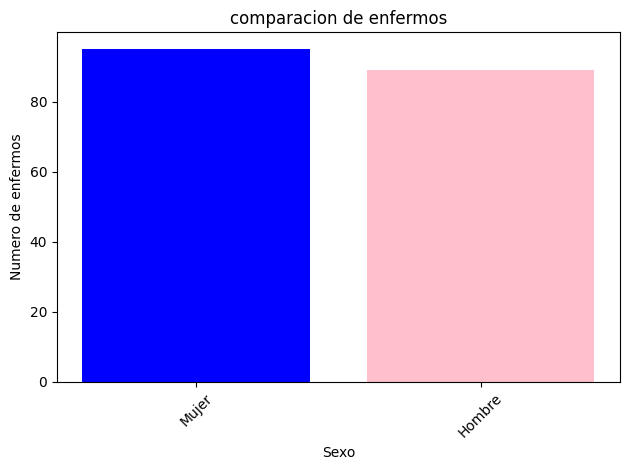

In [41]:
# Gráfico de barras comparando hombres y mujeres enfermos.
conteoM = len(df[(df['Sexo'] == 'Mujer') & (df['Enfermo_COVID'] == 'Sí')])
print("mujeres enfermas",conteoM)

conteoH = len (df[(df['Sexo'] == 'Hombre') & (df['Enfermo_COVID'] == 'Sí')])
print("Hombres enfermos",conteoH)

sexos = ['Mujer','Hombre']
valores = [conteoM, conteoH]

plt.bar(sexos, valores, color=['blue','pink'])
plt.title("comparacion de enfermos")
plt.xlabel("Sexo")
plt.ylabel("Numero de enfermos")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




numero de pacientes hospitalizados:  96
numero de pacientes  no hospitalizados:  204


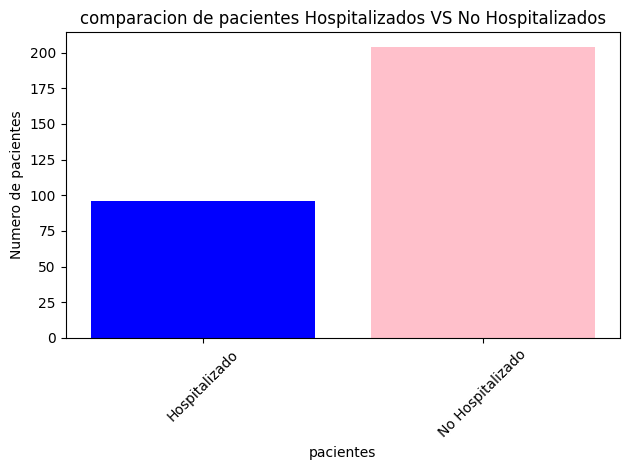

In [42]:
# Gráfico de barras de pacientes hospitalizados vs no hospitalizados.
pHospitalizado = len(df[df['Hospitalizado'] == 'Sí'])
print("numero de pacientes hospitalizados: ",pHospitalizado)

pNoHospitalizado = len(df[df['Hospitalizado'] == 'No'])
print("numero de pacientes  no hospitalizados: ",pNoHospitalizado)

sexos = ['Hospitalizado','No Hospitalizado']
valores = [pHospitalizado, pNoHospitalizado]

plt.bar(sexos, valores, color=['blue','pink'])
plt.title("comparacion de pacientes Hospitalizados VS No Hospitalizados")
plt.xlabel("pacientes")
plt.ylabel("Numero de pacientes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



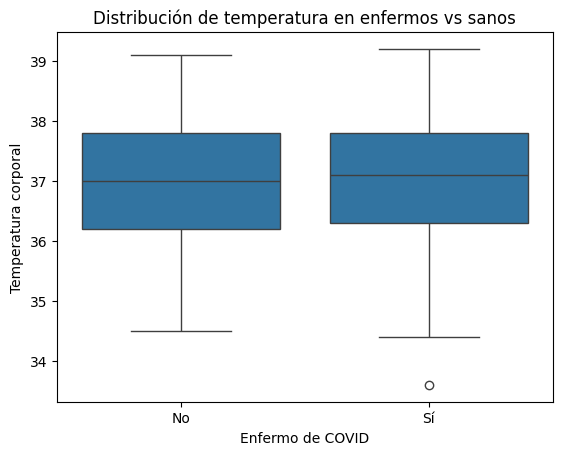

In [43]:
# Boxplot de temperatura en pacientes enfermos vs sanos.
sns.boxplot(x='Enfermo_COVID', y='Temperatura', data=df)
plt.title("Distribución de temperatura en enfermos vs sanos")
plt.xlabel("Enfermo de COVID")
plt.ylabel("Temperatura corporal")
plt.show()

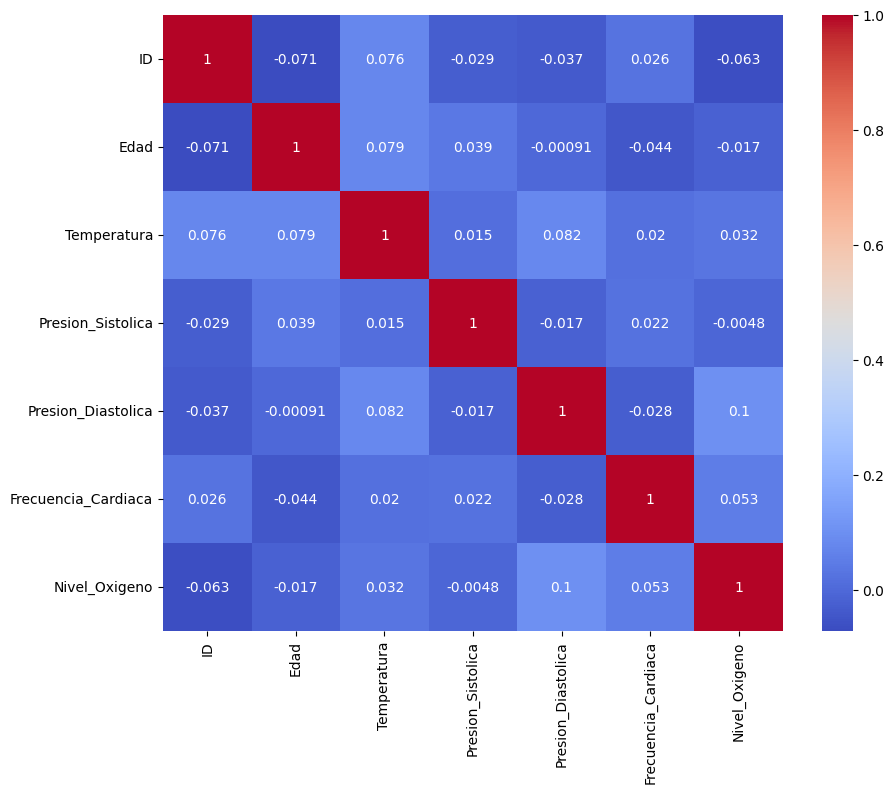

In [46]:
# Heatmap de correlación entre las variables biomédicas.

correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8)) # Define el tamaño de la figura
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()